In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE , ADASYN
from collections import Counter
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC 

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Load the data set
k = pd.read_excel('C:/Users/hocha/Documents/Portfolio Models/Classification/DryBeanDataset/Dry_Bean_Dataset.xlsx')

k.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [2]:
# Explore data:

# Summary statistics

print(k.describe())


                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.

In [3]:
# Data types of each column

print(k.dtypes)


Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object


In [4]:
# Check for missing values

print(k.isnull().sum())


Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [5]:
# Display the shape of the dataframe

print(k.shape)


(13611, 17)


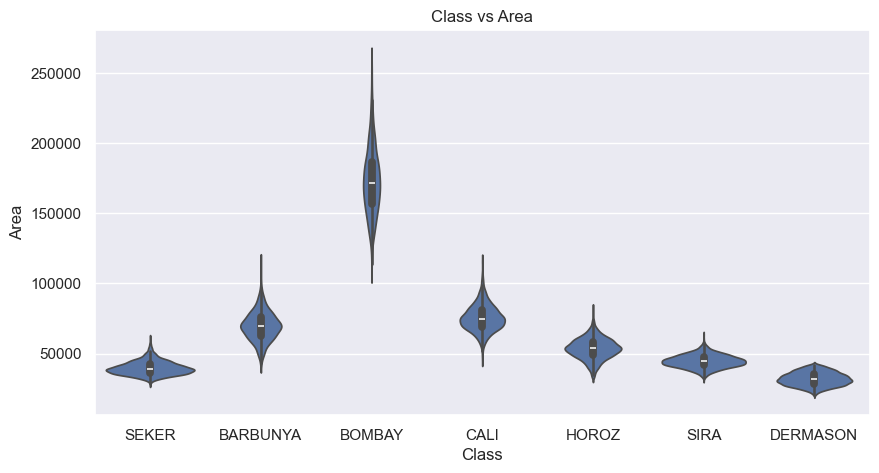

In [6]:
# Plot histograms Class vs Area 

sns.set(rc = {"figure.figsize":(10, 5)})
sns.violinplot( x = 'Class', y = 'Area', data = k)
plt.title( 'Class vs Area')
plt.show()


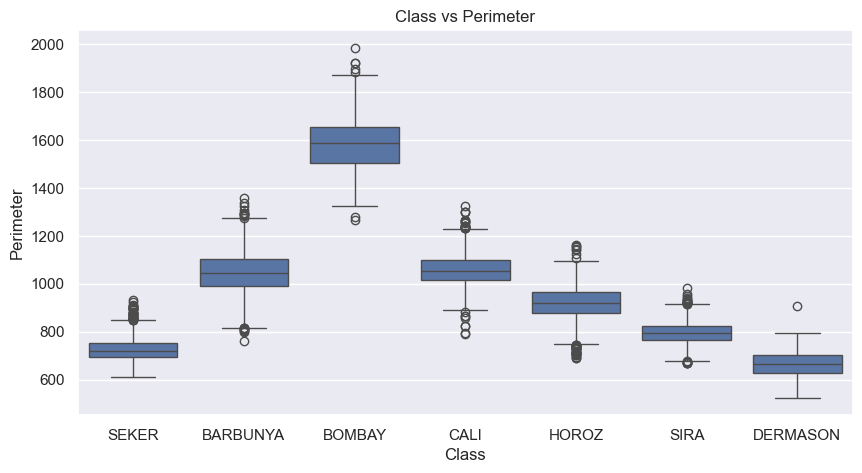

In [7]:
# Plot histograms Class vs Perimeter 

sns.set(rc = {'figure.figsize' : (10, 5)})
a = sns.boxplot( x = 'Class', y = 'Perimeter', data = k)
plt.title( 'Class vs Perimeter')
plt.show()


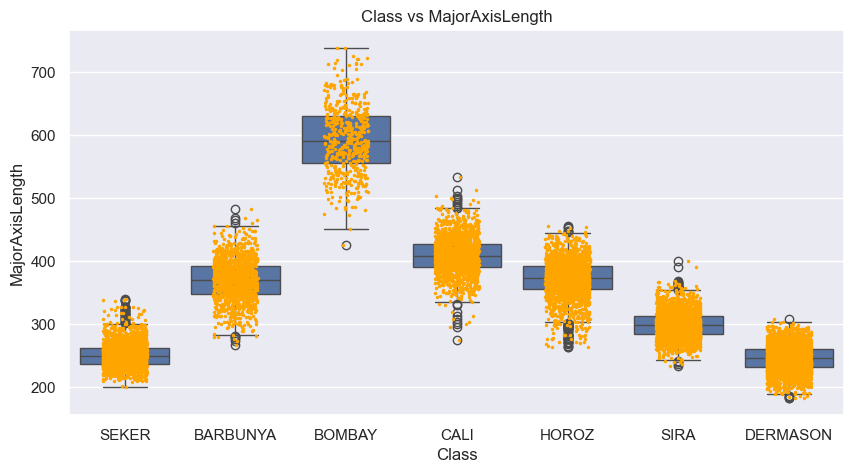

In [8]:
# Plot histograms Class vs MajorAxisLength 

sns.set(rc = {'figure.figsize': (10, 5)})
b = sns.boxplot( x = 'Class', y = 'MajorAxisLength', data = k)
b = sns.stripplot(x = 'Class', y = 'MajorAxisLength', data = k, color ="orange", jitter = 0.2, size = 2.5)
plt.title( 'Class vs MajorAxisLength')
plt.show()


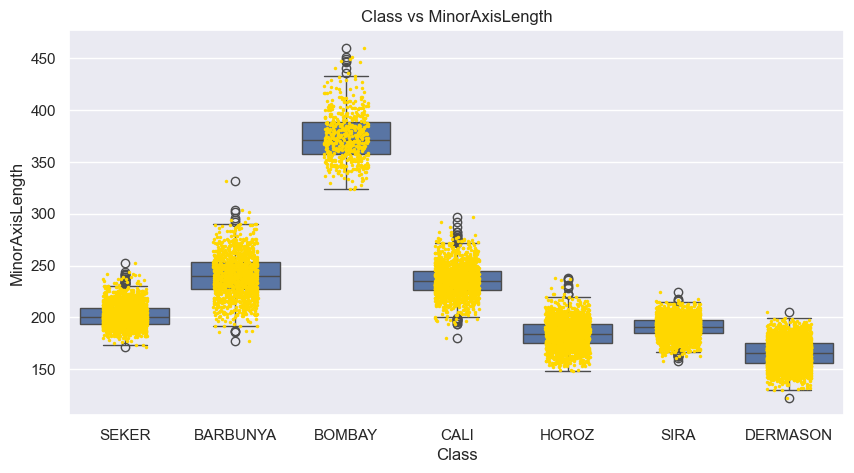

In [9]:
# Plot histograms Class vs MinorAxisLength 

sns.set(rc = {'figure.figsize': (10, 5)})
b = sns.boxplot( x = 'Class', y = 'MinorAxisLength', data = k)
b = sns.stripplot(x = 'Class', y = 'MinorAxisLength', data = k, color = 'gold', jitter = 0.2, size = 2.5)
plt.title( 'Class vs MinorAxisLength')
plt.show()


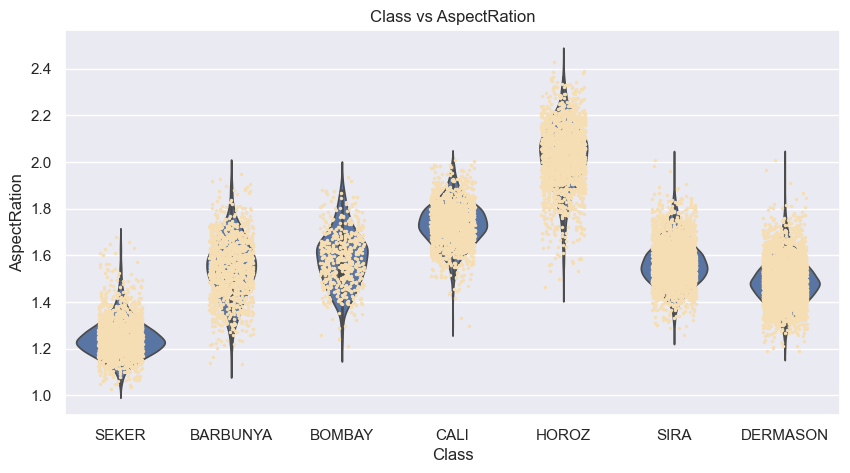

In [10]:
# Plot histograms Class vs AspectRation 

sns.set(rc = {'figure.figsize': (10, 5)})
b = sns.violinplot( x = 'Class', y = 'AspectRation', data = k)
b = sns.stripplot(x = 'Class', y = 'AspectRation', data = k, color = 'wheat', jitter = 0.2, size = 2.5)
plt.title( 'Class vs AspectRation')
plt.show()


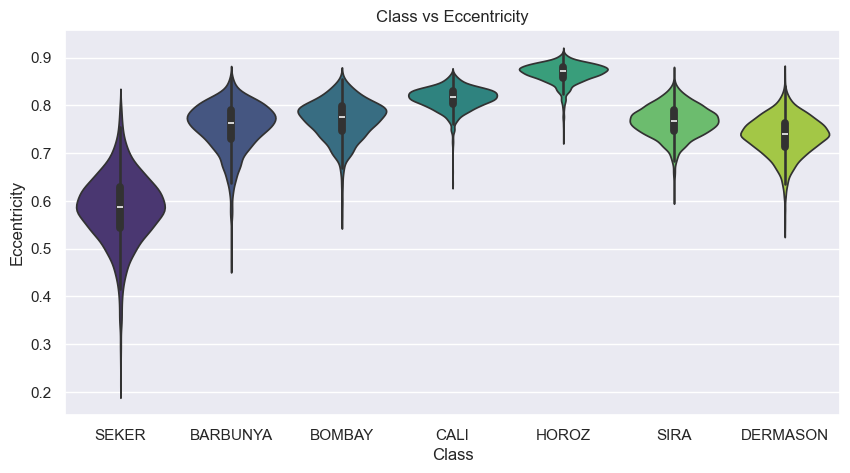

In [11]:
# Plot histograms Class vs Eccentricity 

sns.set(rc = {'figure.figsize': (10, 5)})
c = sns.violinplot( x = 'Class', y = 'Eccentricity', hue = 'Class', palette = 'viridis', data = k )
plt.title( 'Class vs Eccentricity')
plt.show()


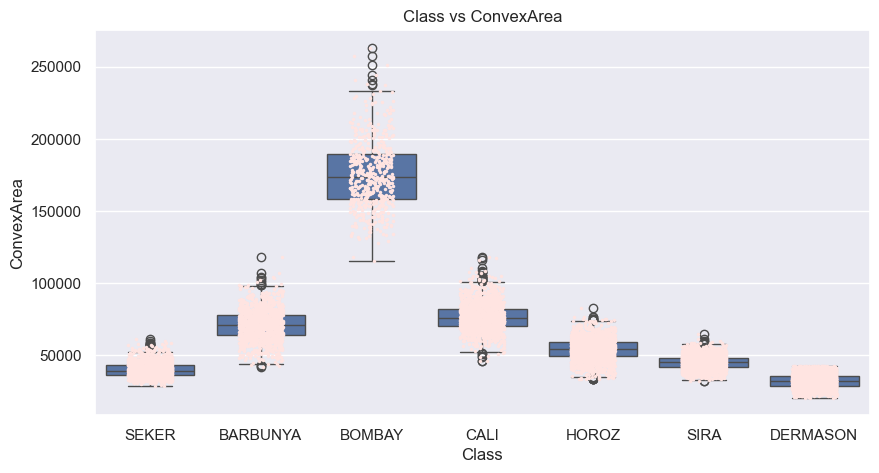

In [12]:
# Plot histograms Class vs ConvexArea 

sns.set(rc = {'figure.figsize': (10, 5)})
b = sns.boxplot( x = 'Class', y = 'ConvexArea', data = k)
b = sns.stripplot(x = 'Class', y = 'ConvexArea', data = k, color = 'mistyrose', jitter = 0.2, size = 2.5)
plt.title( 'Class vs ConvexArea')
plt.show()


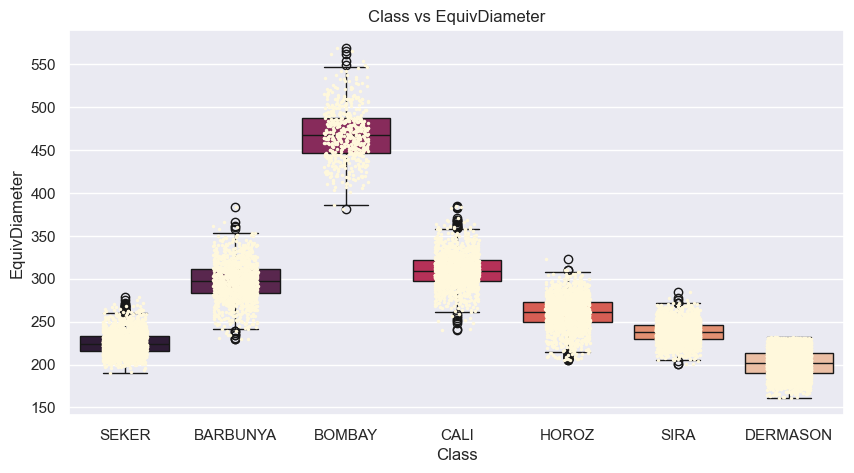

In [13]:
# Plot histograms Class vs EquivDiameter 

sns.set(rc = {'figure.figsize': (10, 5)})
b = sns.boxplot( x = 'Class', y = 'EquivDiameter', hue = 'Class',  palette = 'rocket',  data = k)
b = sns.stripplot(x = 'Class', y = 'EquivDiameter', data = k, color = 'cornsilk', jitter = 0.2, size = 2.5)
plt.title( 'Class vs EquivDiameter')
plt.show()


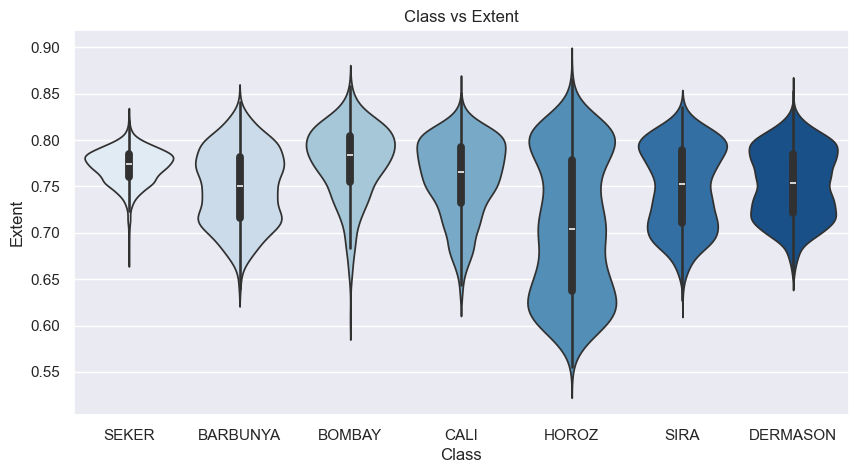

In [14]:
# Plot histograms Class vs Extent 

sns.set(rc = {'figure.figsize': (10, 5)})
sns.violinplot( x = 'Class', y = 'Extent', hue = 'Class',  palette = 'Blues', data = k)
plt.title( 'Class vs Extent')
plt.show()


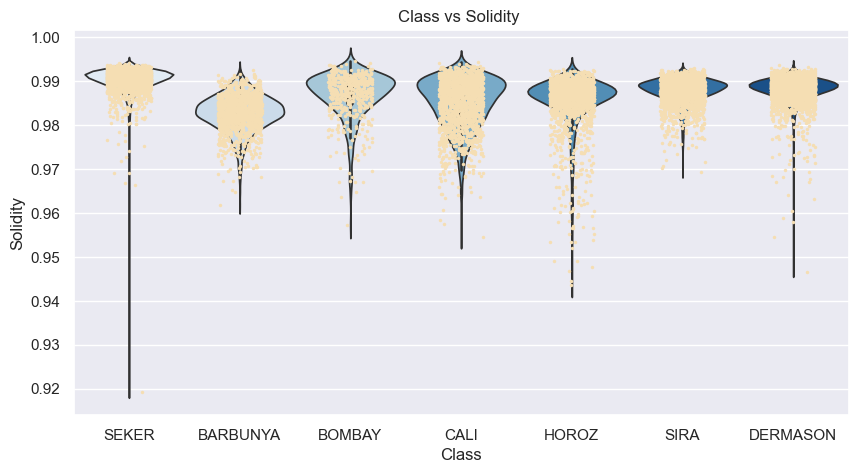

In [15]:
# Plot histograms Class vs Solidity  

sns.set(rc = {'figure.figsize': (10, 5)})
c = sns.violinplot( x = 'Class', y = 'Solidity', hue = 'Class',  palette = 'Blues', data = k)
c = sns.stripplot(x = 'Class', y = 'Solidity', data = k, color = 'wheat', jitter = 0.2, size = 2.5)
plt.title( 'Class vs Solidity ')
plt.show()


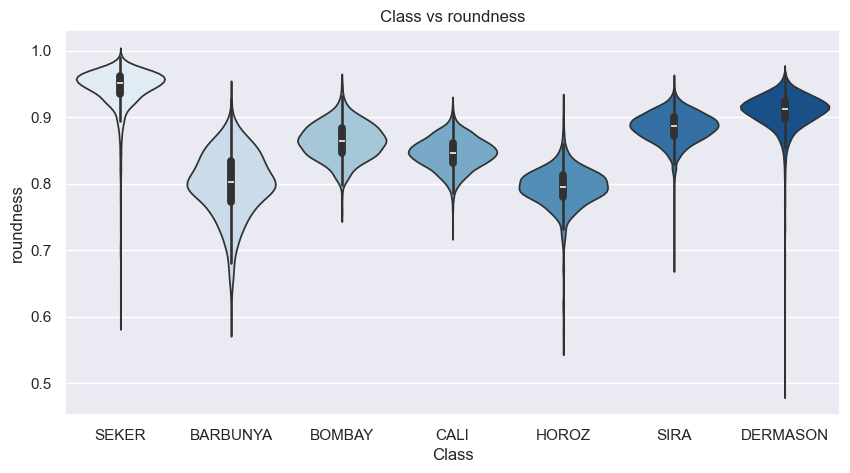

In [16]:
# Plot histograms Class vs roundness  

sns.set(rc = {'figure.figsize': (10, 5)})
sns.violinplot( x = 'Class', y = 'roundness', hue = 'Class',  palette = 'Blues', data = k)
plt.title( 'Class vs roundness')
plt.show()


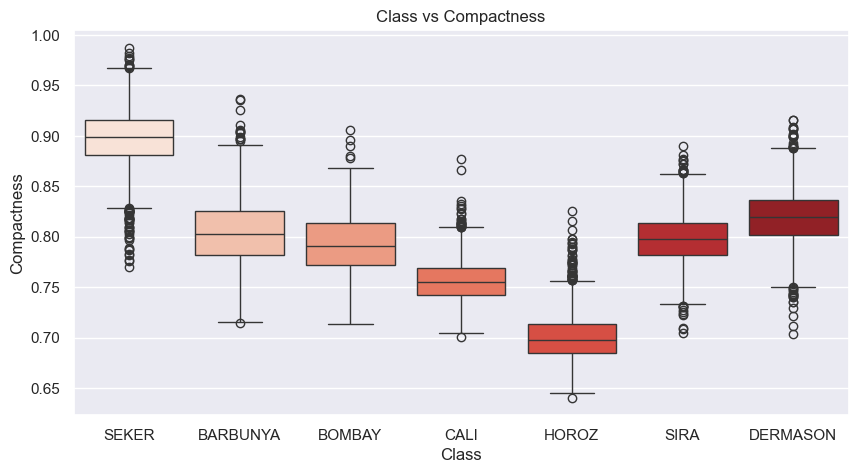

In [17]:
# Plot histograms Class vs Compactness  

sns.set(rc = {'figure.figsize': (10, 5)})
sns.boxplot( x = 'Class', y = 'Compactness', hue = 'Class',  palette = 'Reds', data = k)
plt.title( 'Class vs Compactness')
plt.show()


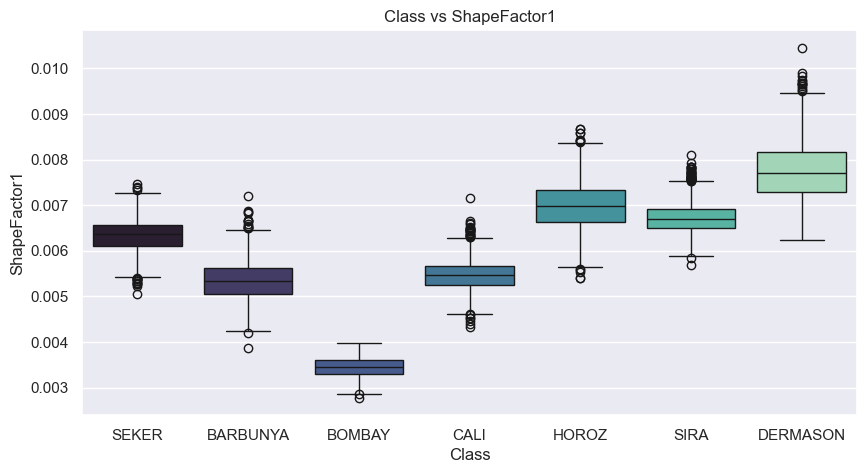

In [18]:
# Plot histograms Class vs ShapeFactor1  

sns.set(rc = {'figure.figsize': (10, 5)})
sns.boxplot( x = 'Class', y = 'ShapeFactor1', hue = 'Class',  palette = 'mako', data = k)
plt.title( 'Class vs ShapeFactor1')
plt.show()


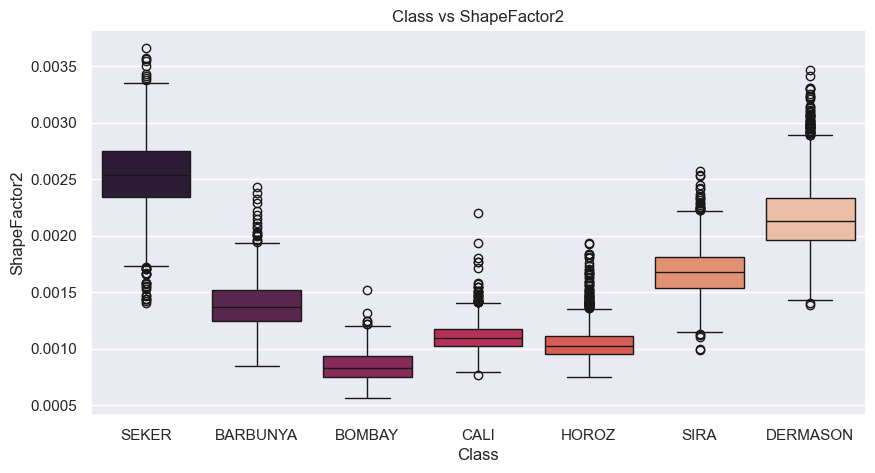

In [19]:
# Plot histograms Class vs ShapeFactor2  

sns.set(rc = {'figure.figsize': (10, 5)})
sns.boxplot( x = 'Class', y = 'ShapeFactor2', hue = 'Class',  palette = 'rocket', data = k)
plt.title( 'Class vs ShapeFactor2')
plt.show()


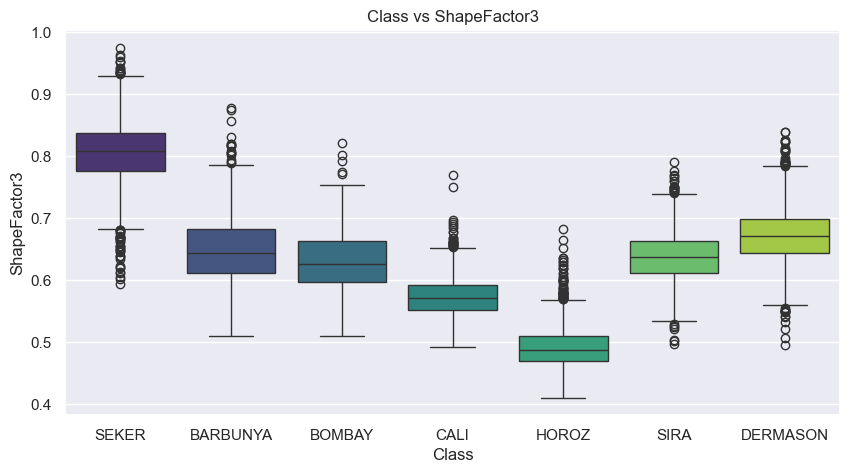

In [20]:
# Plot histograms Class vs ShapeFactor3  

sns.set(rc = {'figure.figsize': (10, 5)})
sns.boxplot( x = 'Class', y = 'ShapeFactor3', hue = 'Class',  palette = 'viridis', data = k)
plt.title( 'Class vs ShapeFactor3')
plt.show()


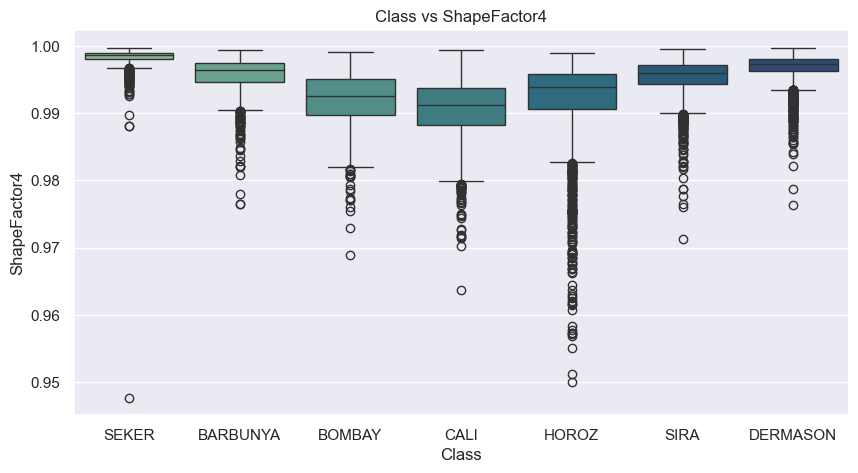

In [21]:
# Plot histograms Class vs ShapeFactor4  

sns.set(rc = {'figure.figsize': (10, 5)})
sns.boxplot( x = 'Class', y = 'ShapeFactor4', hue = 'Class',  palette = 'crest', data = k)
plt.title( 'Class vs ShapeFactor4')
plt.show()


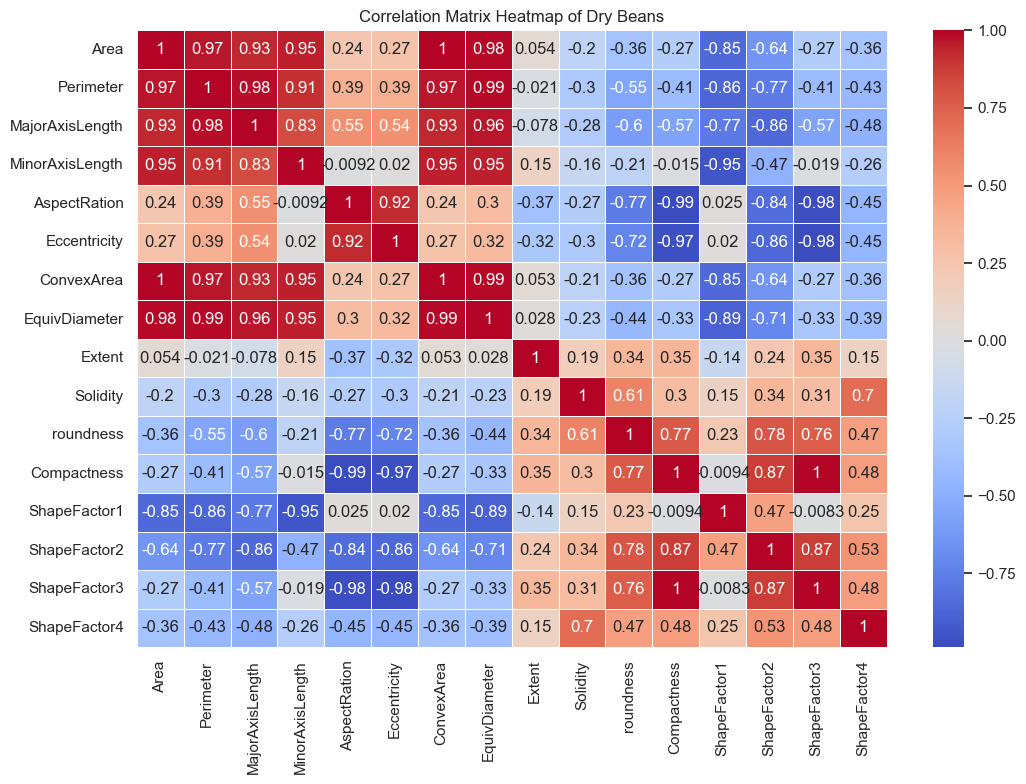

In [22]:
# Create a heatmap of numerical variables

plt.figure(figsize = (11, 8))
sns.heatmap(k.corr(numeric_only = True), annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Matrix Heatmap of Dry Beans')
plt.tight_layout()
plt.show()


Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64


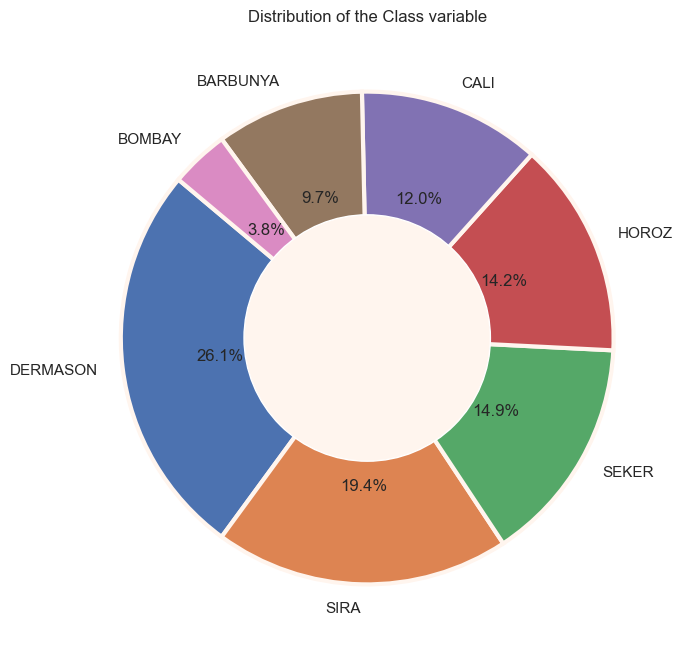

In [23]:
# Check the class balance of response variable "Class"

c = k['Class'].value_counts()
print(c)
plt.figure(figsize = (8, 8))
wedges, texts, autotexts = plt.pie(c, labels = c.index, autopct = '%1.1f%%', 
                                   startangle = 140, wedgeprops = {'linewidth': 3, 'edgecolor': 'seashell'})
centre_circle = plt.Circle((0, 0), 0.50, fc = 'seashell')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribution of the Class variable')
plt.show()


In [24]:
# Split the dataset into training and testing, 80:20 ratio

x = k.drop('Class', axis = 1)
y = k['Class']

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state = 42)


Class
DERMASON    2875
SIRA        2100
SEKER       1614
HOROZ       1520
CALI        1313
BARBUNYA    1061
BOMBAY       405
Name: count, dtype: int64
Class
DERMASON    2875
SEKER       2875
BARBUNYA    2875
SIRA        2875
CALI        2875
HOROZ       2875
BOMBAY      2875
Name: count, dtype: int64


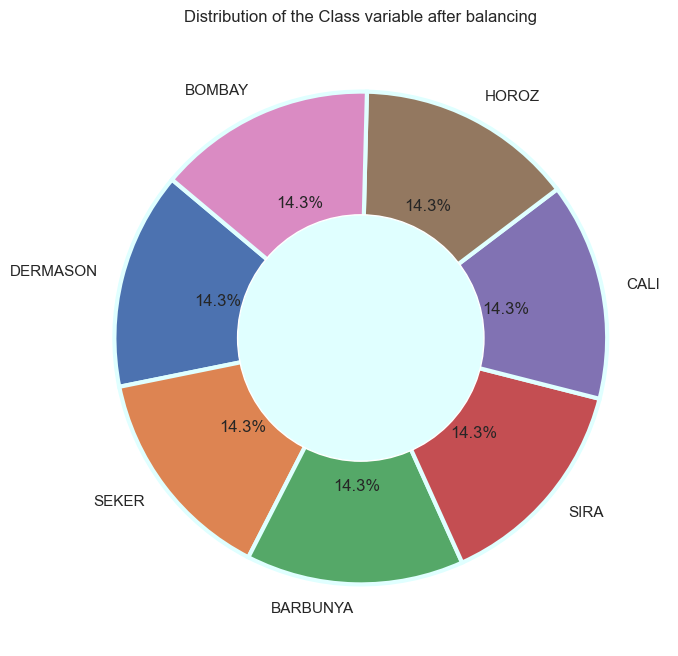

In [25]:
# Balancing the dataset using oversampling method

s = SMOTE(random_state = 222)
x_over, y_over = s.fit_resample(x_train, y_train)

print(y_train.value_counts())
print(y_over.value_counts())

n = y_over.value_counts()

# Visualise data after balancing "Class"

plt.figure(figsize = (8, 8))
wedges, texts, autotexts = plt.pie(n, labels = n.index, autopct = '%1.1f%%', 
                                   startangle = 140, wedgeprops = {'linewidth': 3, 'edgecolor': 'lightcyan'})
centre_circle = plt.Circle((0, 0), 0.50, fc = 'lightcyan')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribution of the Class variable after balancing')
plt.show()


In [26]:
# Standardise the variables

std = StandardScaler()

x_over = std.fit_transform(x_over)
x_test = std.transform(x_test)


In [27]:
# Implement Multinomial Logistic Regression Model


lrm = LogisticRegression(solver = 'lbfgs', max_iter = 200, random_state = 42)
lrm.fit(x_over, y_over)

# Make predictions on the test data
y_fcst = lrm.predict(x_test)

# Confusion Matrix
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_fcst))

# Classification Report
print('\n Classification Report: ')
print(classification_report(y_test, y_fcst))

Confusion Matrix: 
[[244   0  12   0   0   1   4]
 [  0 117   0   0   0   0   0]
 [ 13   0 298   0   4   0   2]
 [  0   0   0 591   1   9  70]
 [  2   0   4   3 394   0   5]
 [  7   0   0   5   0 389  12]
 [  0   0   3  32   8   5 488]]

 Classification Report: 
              precision    recall  f1-score   support

    BARBUNYA       0.92      0.93      0.93       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.94      0.94      0.94       317
    DERMASON       0.94      0.88      0.91       671
       HOROZ       0.97      0.97      0.97       408
       SEKER       0.96      0.94      0.95       413
        SIRA       0.84      0.91      0.87       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [28]:
# Implement Decision Tree Model

sefate = DecisionTreeClassifier(random_state = 42)
sefate.fit(x_over, y_over)

# Make predictions on the test data
y_fcst_sefate = sefate.predict(x_test)

# Confusion Matrix
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_fcst_sefate))

# Classification Report
print('\n Classification Report: ')
print(classification_report(y_test, y_fcst_sefate))

Confusion Matrix: 
[[234   0  16   0   3   3   5]
 [  0 117   0   0   0   0   0]
 [ 21   0 285   0   9   1   1]
 [  2   0   0 591   3  10  65]
 [  5   0   9   3 385   0   6]
 [  2   0   0  21   0 379  11]
 [  9   0   2  50   8  14 453]]

 Classification Report: 
              precision    recall  f1-score   support

    BARBUNYA       0.86      0.90      0.88       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.91      0.90      0.91       317
    DERMASON       0.89      0.88      0.88       671
       HOROZ       0.94      0.94      0.94       408
       SEKER       0.93      0.92      0.92       413
        SIRA       0.84      0.85      0.84       536

    accuracy                           0.90      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.90      0.90      0.90      2723



In [29]:
# Implement Random Forest Model

moru = RandomForestClassifier(n_estimators = 100, random_state = 42)
moru.fit(x_over, y_over)

# Make predictions on the test data
y_fcst_moru = moru.predict(x_test)

# Confusion Matrix
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_fcst_moru))

# Classification Report
print('\n Classification Report: ')
print(classification_report(y_test, y_fcst_moru))


Confusion Matrix: 
[[237   0  16   0   1   2   5]
 [  0 117   0   0   0   0   0]
 [ 12   0 299   0   4   1   1]
 [  0   0   0 607   2   5  57]
 [  3   0   7   3 388   0   7]
 [  3   0   0  11   0 390   9]
 [  1   0   1  43   7   6 478]]

 Classification Report: 
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.91      0.92       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.93      0.94      0.93       317
    DERMASON       0.91      0.90      0.91       671
       HOROZ       0.97      0.95      0.96       408
       SEKER       0.97      0.94      0.95       413
        SIRA       0.86      0.89      0.87       536

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.94      2723
weighted avg       0.92      0.92      0.92      2723



In [30]:
# Implement Neural Network ( Multi-Layer Perception) Model

eu = MLPClassifier(hidden_layer_sizes=(5,2),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')
eu.fit(x_over, y_over)

# Make predictions on the test data
y_fcst_eu = eu.predict(x_test)

# Confusion Matrix
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_fcst_eu))

# Classification Report
print('\n Classification Report: ')
print(classification_report(y_test, y_fcst_eu))



Confusion Matrix: 
[[168   0  10   1  52   0  30]
 [  0 116   1   0   0   0   0]
 [  6   2 287   0  21   0   1]
 [  0   0   0 568   0  34  69]
 [ 20   0  17   1 362   0   8]
 [  4   0   0  53   0 345  11]
 [ 81   0   0  64  17   0 374]]

 Classification Report: 
              precision    recall  f1-score   support

    BARBUNYA       0.60      0.64      0.62       261
      BOMBAY       0.98      0.99      0.99       117
        CALI       0.91      0.91      0.91       317
    DERMASON       0.83      0.85      0.84       671
       HOROZ       0.80      0.89      0.84       408
       SEKER       0.91      0.84      0.87       413
        SIRA       0.76      0.70      0.73       536

    accuracy                           0.82      2723
   macro avg       0.83      0.83      0.83      2723
weighted avg       0.82      0.82      0.82      2723



C:\ProgramData\anaconda3\envs\tf\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
# Implement Support Vector Machine Model

vec = SVC(kernel = 'linear' , decision_function_shape = 'ovr')
vec.fit(x_over, y_over)

# Make predictions on the test data
y_fcst_bn = vec.predict(x_test)

# Confusion Matrix
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_fcst_bn))

# Classification Report
print('\n Classification Report: ')
print(classification_report(y_test, y_fcst_bn))


Confusion Matrix: 
[[244   0  12   0   0   2   3]
 [  0 117   0   0   0   0   0]
 [ 12   0 299   0   4   1   1]
 [  0   0   0 597   2   8  64]
 [  2   0   4   5 393   0   4]
 [  6   0   0   8   0 388  11]
 [  1   0   0  36   7   5 487]]

 Classification Report: 
              precision    recall  f1-score   support

    BARBUNYA       0.92      0.93      0.93       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.95      0.94      0.95       317
    DERMASON       0.92      0.89      0.91       671
       HOROZ       0.97      0.96      0.97       408
       SEKER       0.96      0.94      0.95       413
        SIRA       0.85      0.91      0.88       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723

